In [1]:
import math
import numpy as np
from keras.models import Sequential
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import matplotlib.pyplot as plt
from keras.regularizers import l2
from sklearn.preprocessing import MinMaxScaler
from keras import backend as K
from keras.layers import Conv1D, BatchNormalization,GlobalMaxPooling1D, Permute, Dropout
from keras.layers import Input, Dense, LSTM, concatenate, Activation
from keras.models import Model

Using TensorFlow backend.


In [63]:
dataset = pd.read_csv('final_data_15.csv') 

In [64]:
dataset = dataset.drop(columns=['Unnamed: 0'])

In [65]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,-1
0,-393.872364,143.065715,28.254148,21.915662,36.550758,10.473217,-0.911331,8.257899,5.220637,4.708601,10.514065,6.504892,6.667071,14.438592,11.190200,0
1,-372.423796,152.454533,25.547740,23.805177,36.407758,7.179566,6.794110,19.865749,6.870373,5.237482,14.707940,5.286964,3.571662,15.527777,9.281723,0
2,-419.614457,164.926290,16.018537,26.357706,44.721712,2.263494,3.128924,26.556902,7.887081,-0.748485,13.830055,7.892138,4.597889,17.067968,10.810810,0
3,-384.084138,144.051446,11.477809,5.889607,28.624909,7.281152,6.219459,20.318993,6.130387,2.106977,19.824999,14.229084,-0.724291,6.498971,11.540733,0
4,-382.869809,147.717027,21.790911,16.748959,33.203546,8.217283,9.298968,23.418428,3.936794,-3.981437,15.313313,13.787561,0.820552,7.133867,12.252556,0


In [66]:
x = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

In [67]:
(trainX, testX, trainY, testY) = train_test_split(x,y, test_size=0.10)
trainX = trainX.reshape(trainX.shape[0],trainX.shape[1],1)
testX = testX.reshape(testX.shape[0],testX.shape[1],1)

In [68]:
f = 15

In [69]:
ip = Input(shape=(f,1))

x = LSTM(3)(ip)

y = Permute((2, 1))(ip)
y = Conv1D(32, 3, padding='same', kernel_initializer='he_uniform')(y)
y = BatchNormalization()(y)
y = Activation('relu')(y)

y = Conv1D(64, 2, padding='same', kernel_initializer='he_uniform')(y)
y = BatchNormalization()(y)
y = Activation('relu')(y)
 
y = Conv1D(128, 2, padding='same', kernel_initializer='he_uniform')(y)
y = BatchNormalization()(y)
y = Activation('relu')(y)

y = GlobalMaxPooling1D()(y)
 
x = concatenate([x, y])

out = Dense(1, activation='sigmoid')(x)

model = Model(ip, out)

In [70]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

In [71]:
history = model.fit(trainX, trainY, epochs=200, batch_size=32,verbose=2, validation_data=(testX, testY))

Train on 1975 samples, validate on 220 samples
Epoch 1/200
 - 3s - loss: 0.3487 - accuracy: 0.6947 - val_loss: 0.4427 - val_accuracy: 0.5409
Epoch 2/200
 - 1s - loss: 0.2356 - accuracy: 0.7934 - val_loss: 0.3791 - val_accuracy: 0.6182
Epoch 3/200
 - 1s - loss: 0.2111 - accuracy: 0.8127 - val_loss: 0.2546 - val_accuracy: 0.7773
Epoch 4/200
 - 1s - loss: 0.1934 - accuracy: 0.8228 - val_loss: 0.1671 - val_accuracy: 0.8636
Epoch 5/200
 - 1s - loss: 0.1781 - accuracy: 0.8359 - val_loss: 0.1555 - val_accuracy: 0.8636
Epoch 6/200
 - 1s - loss: 0.1635 - accuracy: 0.8471 - val_loss: 0.1288 - val_accuracy: 0.8909
Epoch 7/200
 - 1s - loss: 0.1571 - accuracy: 0.8572 - val_loss: 0.1368 - val_accuracy: 0.8591
Epoch 8/200
 - 1s - loss: 0.1499 - accuracy: 0.8592 - val_loss: 0.1267 - val_accuracy: 0.8818
Epoch 9/200
 - 1s - loss: 0.1494 - accuracy: 0.8597 - val_loss: 0.1313 - val_accuracy: 0.8818
Epoch 10/200
 - 1s - loss: 0.1372 - accuracy: 0.8709 - val_loss: 0.1212 - val_accuracy: 0.8818
Epoch 11/200

Epoch 87/200
 - 1s - loss: 0.0764 - accuracy: 0.9251 - val_loss: 0.1015 - val_accuracy: 0.9000
Epoch 88/200
 - 1s - loss: 0.0870 - accuracy: 0.9170 - val_loss: 0.0831 - val_accuracy: 0.9182
Epoch 89/200
 - 1s - loss: 0.0739 - accuracy: 0.9276 - val_loss: 0.0725 - val_accuracy: 0.9227
Epoch 90/200
 - 1s - loss: 0.0718 - accuracy: 0.9316 - val_loss: 0.0791 - val_accuracy: 0.9227
Epoch 91/200
 - 1s - loss: 0.0763 - accuracy: 0.9251 - val_loss: 0.1028 - val_accuracy: 0.9000
Epoch 92/200
 - 1s - loss: 0.0755 - accuracy: 0.9276 - val_loss: 0.0718 - val_accuracy: 0.9318
Epoch 93/200
 - 1s - loss: 0.0746 - accuracy: 0.9271 - val_loss: 0.0617 - val_accuracy: 0.9364
Epoch 94/200
 - 1s - loss: 0.0744 - accuracy: 0.9271 - val_loss: 0.0924 - val_accuracy: 0.9182
Epoch 95/200
 - 1s - loss: 0.0799 - accuracy: 0.9210 - val_loss: 0.0770 - val_accuracy: 0.9273
Epoch 96/200
 - 1s - loss: 0.0741 - accuracy: 0.9256 - val_loss: 0.0692 - val_accuracy: 0.9318
Epoch 97/200
 - 1s - loss: 0.0815 - accuracy: 0.92

Epoch 173/200
 - 1s - loss: 0.0668 - accuracy: 0.9357 - val_loss: 0.0642 - val_accuracy: 0.9409
Epoch 174/200
 - 1s - loss: 0.0627 - accuracy: 0.9392 - val_loss: 0.0661 - val_accuracy: 0.9409
Epoch 175/200
 - 1s - loss: 0.0608 - accuracy: 0.9408 - val_loss: 0.0595 - val_accuracy: 0.9455
Epoch 176/200
 - 1s - loss: 0.0593 - accuracy: 0.9413 - val_loss: 0.0870 - val_accuracy: 0.9136
Epoch 177/200
 - 1s - loss: 0.0605 - accuracy: 0.9403 - val_loss: 0.0639 - val_accuracy: 0.9364
Epoch 178/200
 - 1s - loss: 0.0631 - accuracy: 0.9397 - val_loss: 0.0677 - val_accuracy: 0.9364
Epoch 179/200
 - 1s - loss: 0.0560 - accuracy: 0.9463 - val_loss: 0.0701 - val_accuracy: 0.9318
Epoch 180/200
 - 1s - loss: 0.0572 - accuracy: 0.9458 - val_loss: 0.0652 - val_accuracy: 0.9364
Epoch 181/200
 - 1s - loss: 0.0572 - accuracy: 0.9463 - val_loss: 0.0640 - val_accuracy: 0.9364
Epoch 182/200
 - 1s - loss: 0.0633 - accuracy: 0.9392 - val_loss: 0.0697 - val_accuracy: 0.9364
Epoch 183/200
 - 1s - loss: 0.0622 - acc

In [72]:
loss,acc = model.evaluate(testX, testY, batch_size=32)
print('Validation Accuracy : '+str(acc))
print('Validation Loss : '+str(loss))

220/220 [==============================] - 0s 112us/step
Validation Accuracy : 0.9454545378684998
Validation Loss : 0.06500858149745248


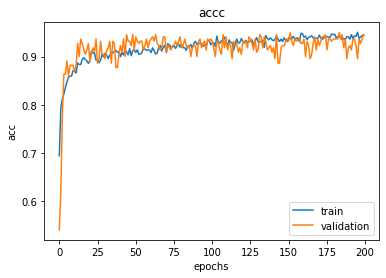

In [73]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend(['train','validation'],loc='lower right')
plt.show()

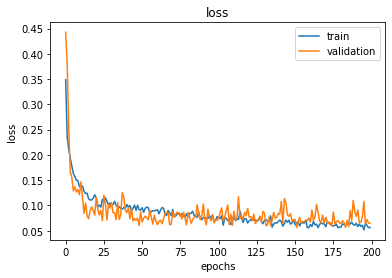

In [74]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','validation'],loc='upper right')
plt.show()

In [75]:
y_predict = model.predict(testX)

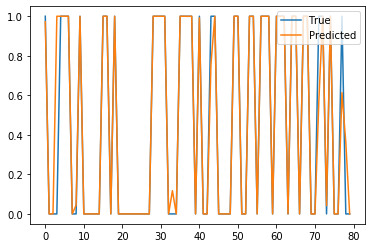

In [76]:
plt.plot(testY[20:100])
plt.plot(y_predict[20:100])
plt.legend(['True','Predicted'],loc='upper right')
plt.show()

In [30]:
import sounddevice as sd
import soundfile as sf
import tkinter as tk
import librosa as lr

In [46]:
def check():
    features = 0
    Fs = 16000
    d  = 2
    a = sd.rec(int(d*Fs),Fs,1,blocking=True)
    sf.write('file.wav',a,Fs)
    X,sample_rate = lr.load('file.wav',res_type='kaiser_fast',duration=3,sr=8000*2,offset=0)
    features = np.mean(lr.feature.mfcc(y=X,sr=sample_rate,n_mfcc=17),axis=1)
    features = features.reshape(-1, 1) 
    scaler.fit(features)
    scaler.transform(features)
    features = features.reshape(1,17,1)
    o = model.predict(features)
    if o>0.9:
        print('Angry')
    else:
        print('Happy')
    print(o)

In [55]:
#root = tk.Tk()
#btn1 = tk.Button(root,text="Start Record",command=check)


#btn1.pack()
#root.mainloop()

In [54]:
X,sample_rate = lr.load('BSi004.wav',res_type='kaiser_fast',duration=3,sr=8000*2,offset=0)
features = np.mean(lr.feature.mfcc(y=X,sr=sample_rate,n_mfcc=17),axis=1)
features = features.reshape(1,17,1)
o = model.predict(features)
if o>0.9:
    print('Angry')
else:
    print('Happy')
print(o)

Angry
[[0.9999896]]
